In [1]:
import os
import numpy as np
import pandas as pd

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


In [70]:
# test = torch.load("LSTMData-0.001.pt")

In [71]:
# test = torch.from_numpy(test[0][0][:4000])

In [2]:
test = torch.rand(size = (1,1000))

In [3]:
test.shape

torch.Size([1, 1000])

In [4]:
def Masking(channel: torch.Tensor, window: int= 150):
    '''
    Set to zero 
    Input: \\
    -channel = Tensor \\
    -window = Number of samples to set to zero
    Output: Numpy array masked
    '''
    channel_size = len(channel)

    mask = torch.zeros(window)
    first = torch.randint(0,channel_size- window,(1,1))

    masked = torch.cat([channel[:first],
                        mask,
                        channel[first+window:]])
    return masked

In [6]:
def DCVoltage(channel : torch.Tensor, max_magnitude: float = 0.5):
    ''' 
    Add a DC component between [-max_mangitude, max_magnitude]\\
    Input:  \\
    -channel = Tensor \\
    -max_magnitude = max value to be added
    Output: Numpy array 
    '''
    dc_comp = (torch.rand(1)*2 - 1)*max_magnitude
    dispaced_channel = channel + dc_comp
    return dispaced_channel    

In [10]:
def GaussianNoise(channel: np.array, std: float = 10):
    '''
    Add Gaussian Noise with zero mean and std deviation
    Input:  -channel = Numpy array
            -std = Gaussian std
    Output: Channel with additive gaussian noise added
    '''
#     channel_size = len(channel)
    noise = torch.normal(mean = 0.0,std = std, size = channel.shape)
    # noise = np.random.normal(loc = 0, scale= std, size= channel_size)
    noisy_channel = channel + noise
    return noisy_channel

In [11]:
GaussianNoise(test)

tensor([[ 8.4597e+00, -2.3145e+00, -2.3165e+01, -1.0743e+01,  7.6337e+00,
         -4.0580e+00,  1.3912e+00, -3.2298e+00,  1.7035e+01,  1.9050e+00,
          2.1978e+00,  1.8726e-01,  4.9622e+00,  1.4100e+00, -9.3217e+00,
          3.3132e+00, -5.4620e+00,  2.1094e+00,  1.1362e+01, -9.5194e+00,
          5.1718e+00, -1.5704e+00, -1.3333e+00,  4.5747e+00,  1.1615e+01,
         -1.5012e+01, -4.3640e+00, -1.6850e+01, -1.5139e+01, -1.1334e+00,
         -2.0548e+00,  1.1476e+01,  1.2223e+01,  1.0574e+01,  1.7694e+01,
          9.8959e+00,  1.3870e+01, -2.6427e+00,  8.4005e+00,  1.2743e+01,
          1.7348e+01, -2.5210e+00, -3.7086e+00,  1.8768e+01, -7.0158e+00,
         -1.0265e+01,  3.8202e+00,  1.7310e+00, -2.7164e-01, -3.8341e+00,
          1.1939e+00,  3.9189e+00,  6.8442e+00,  4.1482e+00, -1.3826e+01,
          5.1281e-01,  2.9382e+00, -3.0245e+01, -6.4497e+00, -1.1021e+01,
         -1.8277e+01, -1.5211e+00, -8.1822e+00,  8.9236e+00, -1.9025e-01,
         -3.1823e+00,  1.1084e+01, -1.

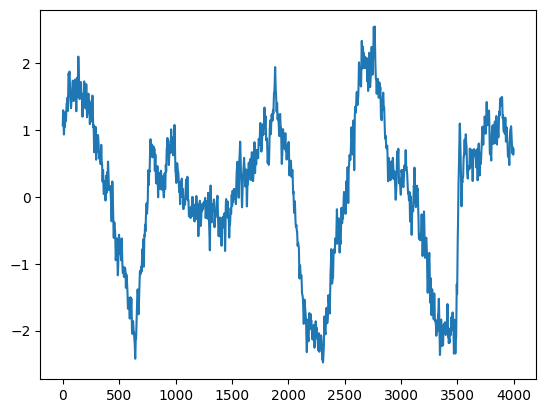

In [86]:
plt.plot(test.squeeze())
plt.show()